## scDEF on a whole adult Planaria
scDEF is a statistical model that learns signatures of gene expression at multiple levels of resolution in an unsupervised manner. The model enables dimensionality reduction, clustering, and de novo signature identification from scRNA-seq data.

Here we apply scDEF to the *Schmidtea mediterranea* data set  used in the `PAGA` paper (https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1663-x#Fig3). We start from pre-processed data following https://nbviewer.org/github/rajewsky-lab/planarian_lineages/blob/master/paga/planaria.ipynb and https://nbviewer.org/github/theislab/paga/blob/master/planaria/planaria.ipynb.


Muscle: mhc, myoD

Neuronal: coe, chat

Parenchymal: runt-2

Gut: ferritin, cathepsinC

Epidermal: vim-1, ifa-1 (dd_Smed_v6_364_0)

Muscle/Neuronal: gli1, trim9

Parenchymal/Neuronal: trim37, traf1

Parenchymal/Gut: nfx-1

Epidermal/Gut: traf2, creb3

Parenchymal/Neuronal/Muscle: nova, paxilin

Parenchymal/Neuronal/Gut: tor, bcat-3

Neoblast: Smedwi-1, tub-\alpha1

### Ground truth


In [1]:
true_hierarchy = {'stem cells': ['neoblast'], 
                  'neurons': ['ChAT neurons 1', 'ChAT neurons 2', 'GABA neurons',  'spp-11+ neurons', 'npp-18+ neurons', 'cav-1+ neurons', 'neural progenitors'], 
                  'epidermis': ['early epidermal progenitors', 'activated early epidermal progenitors', 'epidermal neoblasts', 'epidermis', 'epidermis DVb', 'epidermis DVb neoblast', 'late epidermal progenitors 1', 'late epidermal progenitors 2'], 
                  'muscle': [ 'muscle body', 'muscle pharynx', 'muscle progenitors', ],
                  'parenchyma': ['pgrn+ parenchymal cells', 'ldlrr-1+ parenchymal cells', 'psap+ parenchymal cells', 'aqp+ parenchymal cells', 'parenchymal progenitors',],
                  'secretory': [ 'secretory 1', 'secretory 2', 'secretory 3', 'secretory 4'],
                  'pharynx': ['pharynx cell type progenitors', 'pharynx cell type', ],
                  'gut': ['gut progenitors','phagocytes', 'goblet cells',],
                  'protonephridia': ['protonephridia'],
                  'pigment': ['pigment'],
                  'otf+ cells 1': ['otf+ cells 1'],
                  'otf+ cells 2': ['otf+ cells 2'],
                  'psd+ cells': ['psd+ cells'],
                  'glia': ['glia']}

### Load packages and data

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# import jax.numpy as jnp

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

import scdef

/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
adata = sc.read_h5ad('planaria/planaria_pp.h5ad') 

In [4]:
adata.obs['clusters_coarse'].value_counts()

stem cells        8075
epidermis         4391
neurons           2358
muscle            2351
parenchyma        2042
gut                745
secretory          466
pigment            321
pharynx            292
psd+ cells         174
otf+ cells 1       166
otf+ cells 2       127
protonephridia      80
glia                24
Name: clusters_coarse, dtype: int64

/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


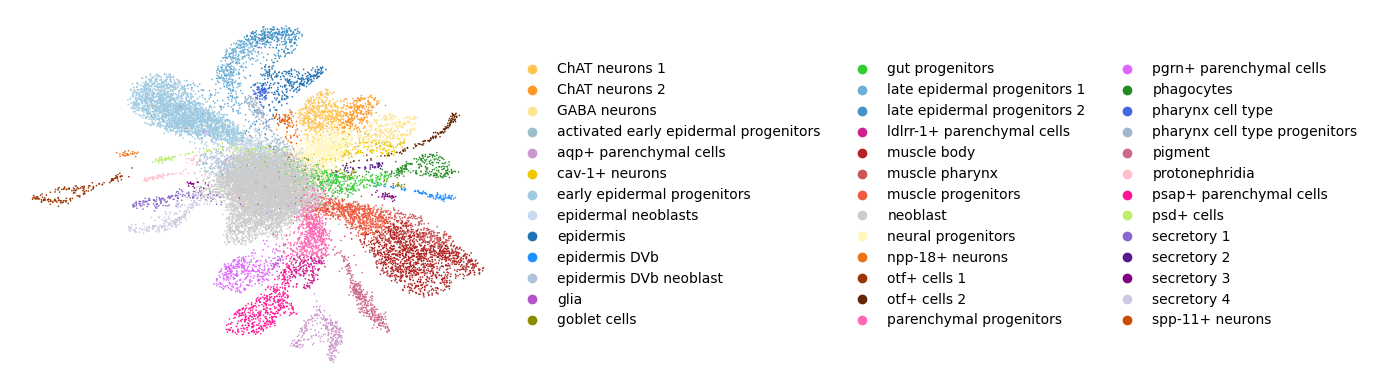

In [5]:
ax = sc.pl.umap(adata, color=['clusters_neoblasts'], frameon=False, show=False)
ax.set_title('')
plt.show()

In [6]:
adata

AnnData object with n_obs × n_vars = 21612 × 4900
    obs: 'n_genes', 'n_counts', 'louvain', 'clusters', 'clusters_neoblasts', 'clusters_coarse'
    var: 'n_cells', 'mean', 'std'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'clusters_neoblasts_colors', 'clusters_neoblasts_sizes', 'clusters_sizes', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'paga', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

### Learn scDEF

In [7]:
scd = scdef.scDEF(adata, counts_layer='counts',)
print(scd) # inspect the scDEF object, which contains a copy of the input AnnData

scDEF object with 5 layers
	Layer names: factor, hfactor, hhfactor, hhhfactor, hhhhfactor
	Layer sizes: 100, 60, 30, 10, 1
	Layer shape parameters: 0.3, 0.3, 0.3, 0.3, 1.0
	Layer rate parameters: 0.3, 3.0, 6.0, 10.0, 30.0
	Layer factor shape parameters: 1.0, 1.0, 1.0, 1.0, 1.0
	Layer factor rate parameters: 100.0, 1.0, 1.0, 1.0, 1.0
	Using BRD with prior parameter: 1000.0
	Number of batches: 1
Contains AnnData object with n_obs × n_vars = 21612 × 4900
    obs: 'n_genes', 'n_counts', 'louvain', 'clusters', 'clusters_neoblasts', 'clusters_coarse'
    var: 'n_cells', 'mean', 'std'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'clusters_neoblasts_colors', 'clusters_neoblasts_sizes', 'clusters_sizes', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'paga', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


Large datasets may not fit in GPU memory. In these cases scDEF can be learned with a small `batch_size`. We will also use fewer epochs to make learning quicker. We can then check the ELBO trace to assess convergence.

In [8]:
scd.learn(n_epoch=[1000], lr=0.1) # learn the hierarchical gene signatures

100%|██████████| 1000/1000 [28:06<00:00,  1.69s/it, Loss=5.89e+7]


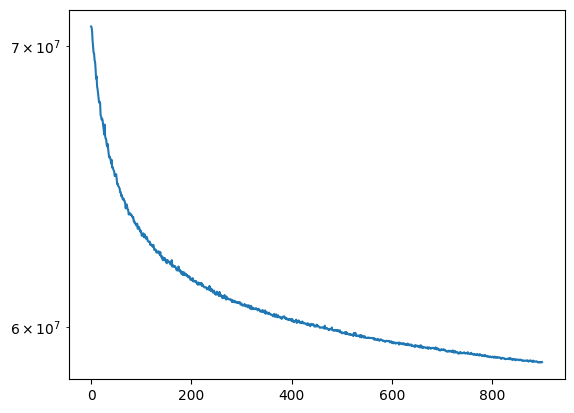

In [9]:
plt.plot(np.concatenate(scd.elbos)[100:])
plt.yscale('log')
plt.show()

### Downstream analyses

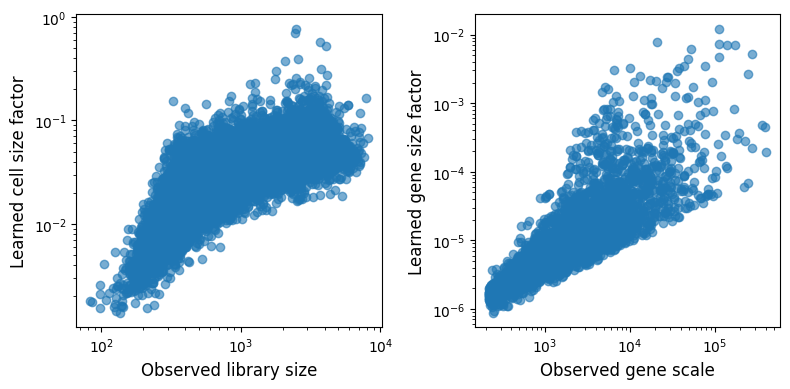

In [10]:
scd.plot_scales()

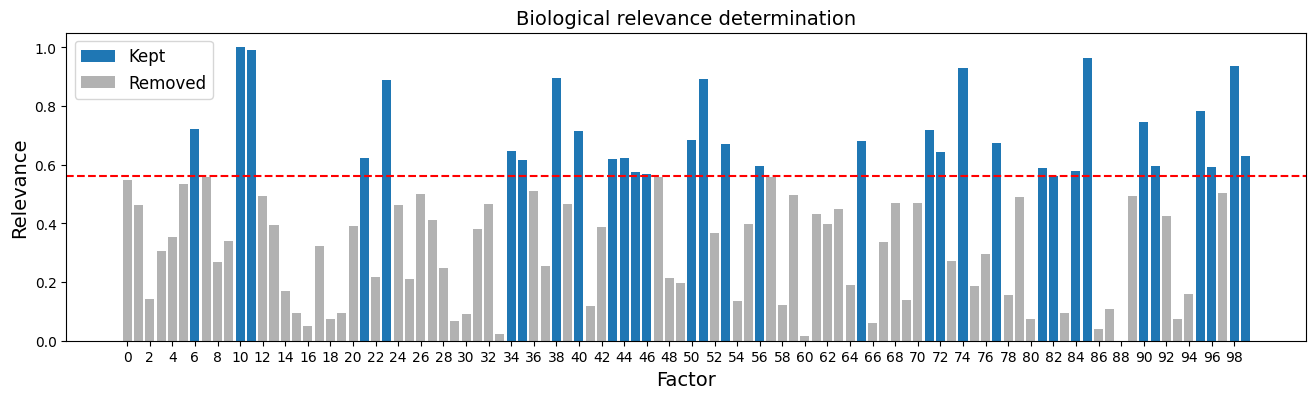

In [11]:
# See relevances
scd.plot_brd(iqr_mult=4, figsize=(16,4))

In [12]:
# Actually do the filtering
scd.filter_factors(iqr_mult=2.) 

/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


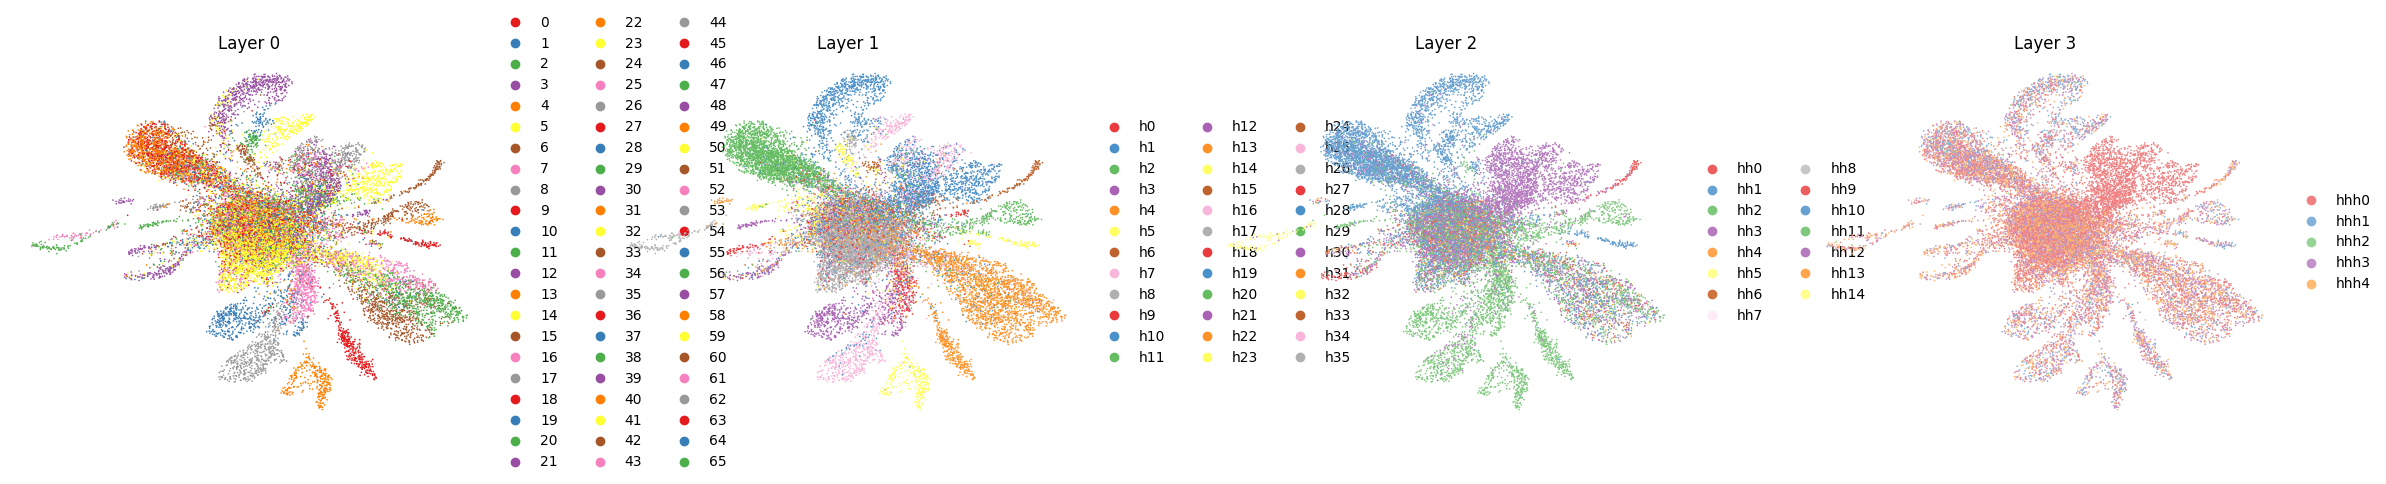

In [13]:
sc.pl.umap(scd.adata, color=['factor', 'hfactor', 'hhfactor', 'hhhfactor'], 
           title=['Layer 0', 'Layer 1', 'Layer 2', 'Layer 3'], frameon=False)

As indicated in the log messages, the `scd.adata` object was updated with multiple annotations based on the filtered factors. For example, it assigned each cell to each factor at each level of resolution. We can visualize these assignments in the original UMAP.

We can visualize the relationships between the different layers using `scd.make_graph`, which uses Graphviz to plot the scDEF graph.

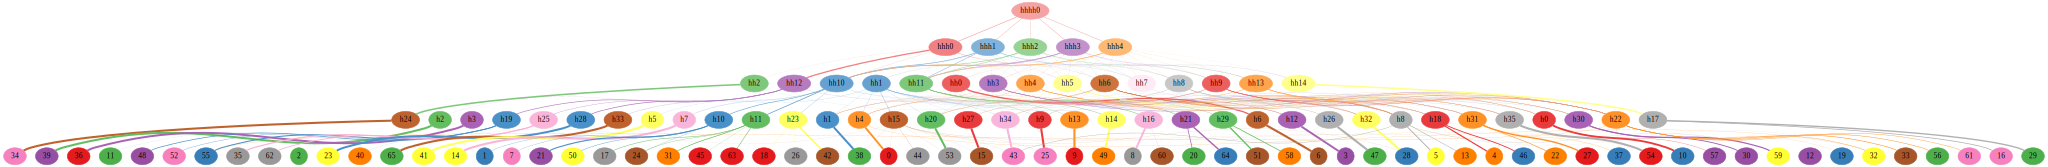

In [14]:
scd.make_graph(filled='factor', show_signatures=False) # simple graph with color-filled nodes
scd.graph # Graphviz object

Let's color the nodes by the known cluster labels, both at coarse and high-resolution ones (respectively `clusters_neoblasts` and `clusters_coarse`).

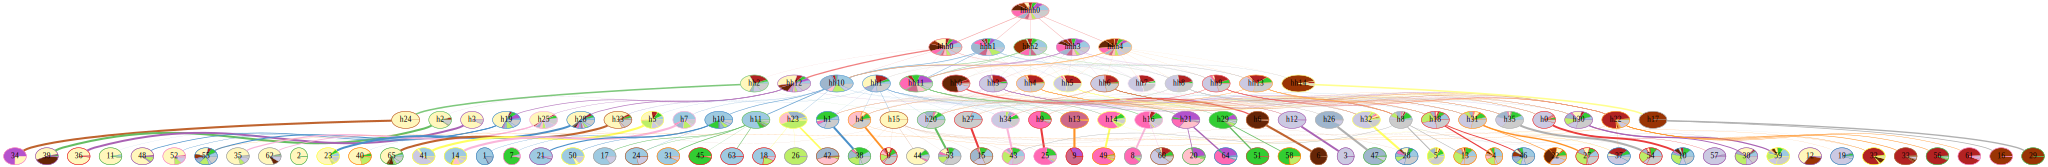

In [15]:
scd.make_graph(wedged='clusters_coarse', show_signatures=False)
scd.graph

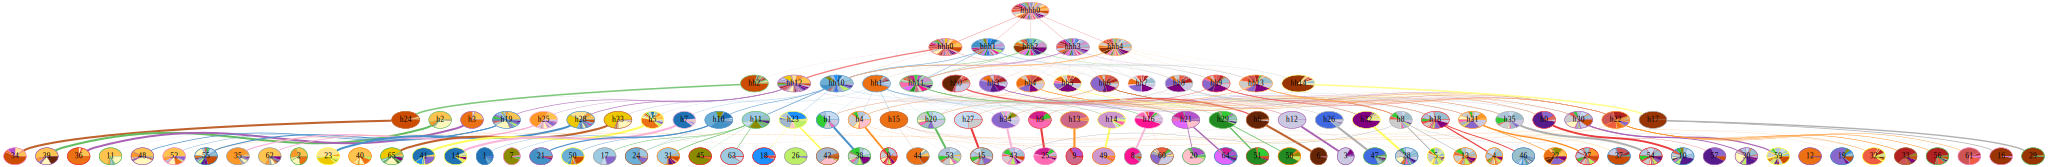

In [16]:
scd.make_graph(wedged='clusters_neoblasts', show_signatures=False)
scd.graph

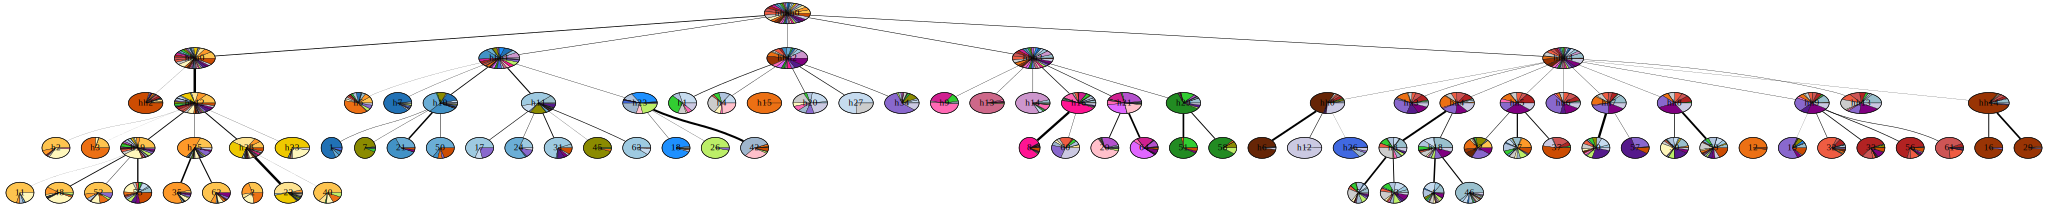

In [17]:
hierarchy_scdef = scd.get_hierarchy()
scd.make_graph(hierarchy_scdef, show_signatures=False, wedged='clusters_neoblasts',
              color_edges=False)
scd.graph

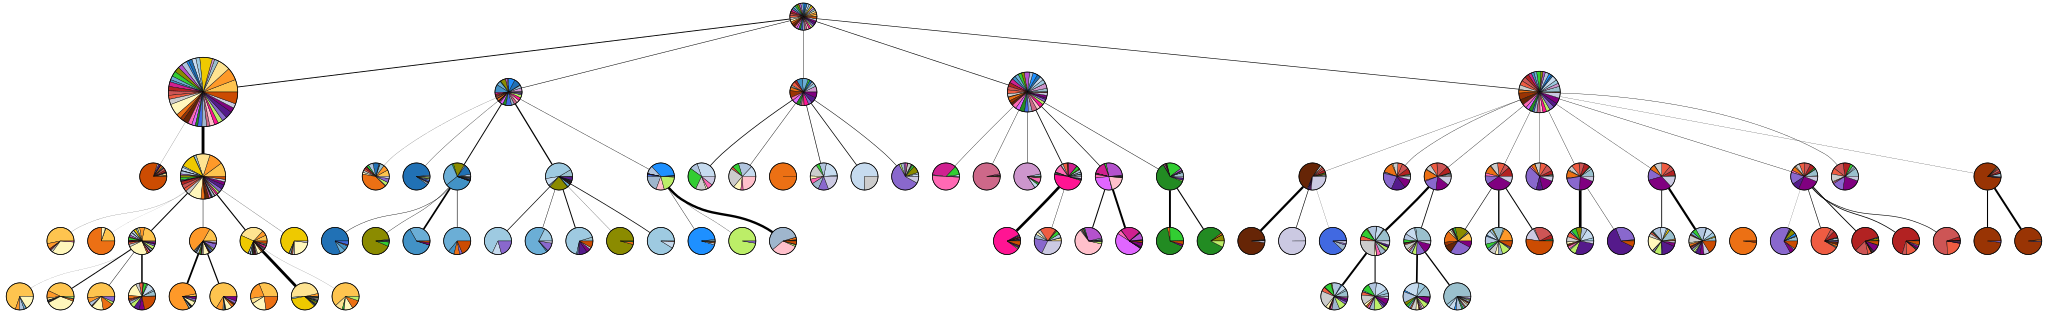

In [24]:
hierarchy_scdef = scd.get_hierarchy()
scd.make_graph(hierarchy=hierarchy_scdef, show_signatures=False, wedged='clusters_neoblasts', 
               n_cells=True, show_label=False, node_size_min=0.5, node_size_max=3.,
              color_edges=False) # scale by number of cells and remove labels
scd.graph
# scd.graph.render('planaria_hrc.pdf')

/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/work/bewi/members/pedrof/miniconda3/envs/py38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


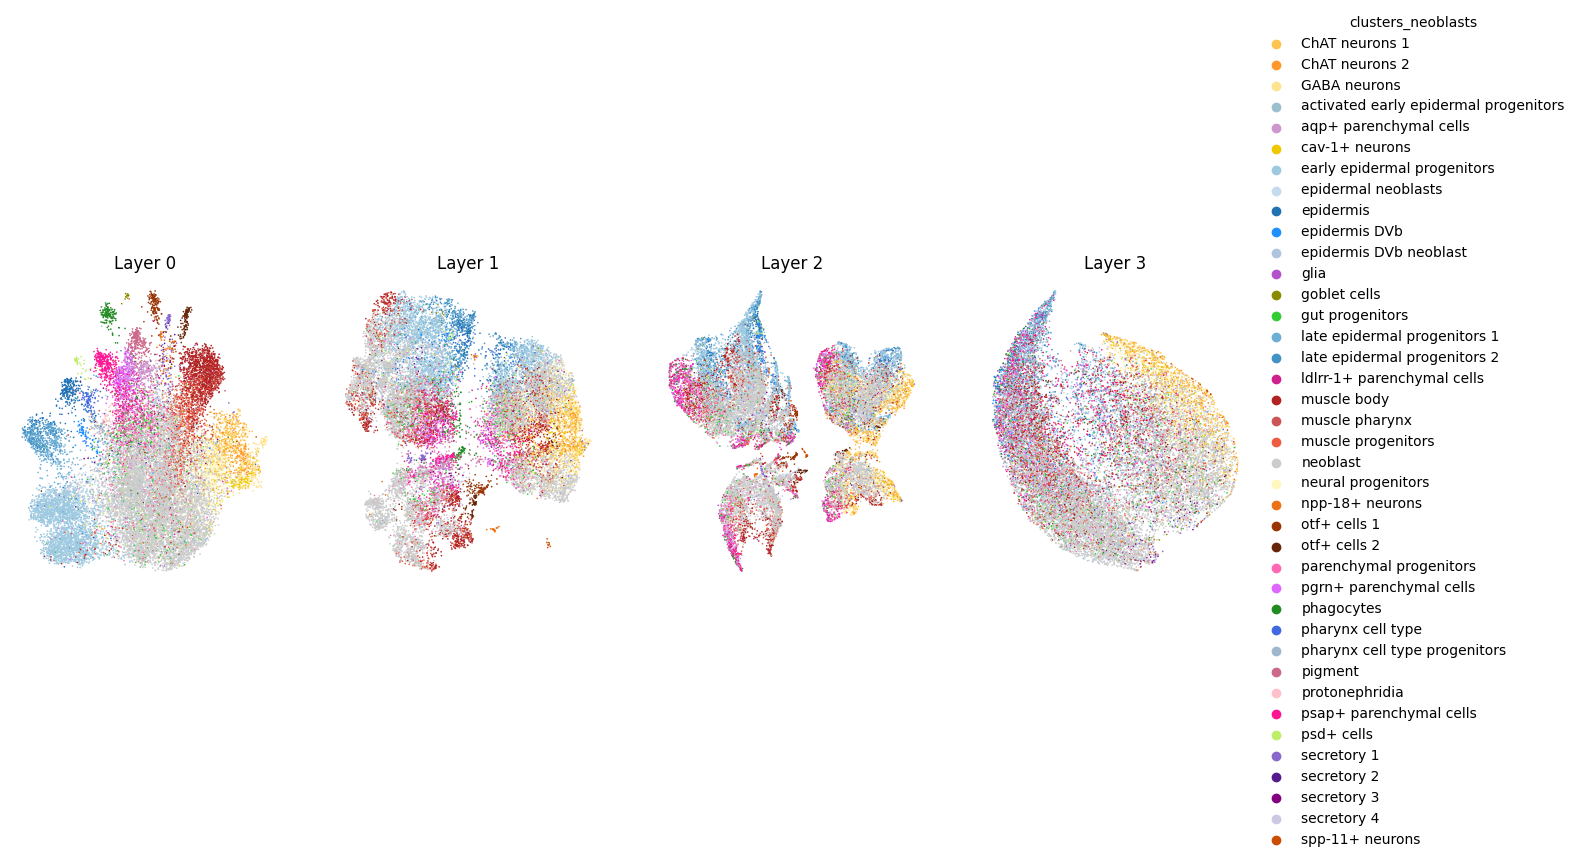

In [19]:
scd.plot_umaps(color=['clusters_neoblasts'])

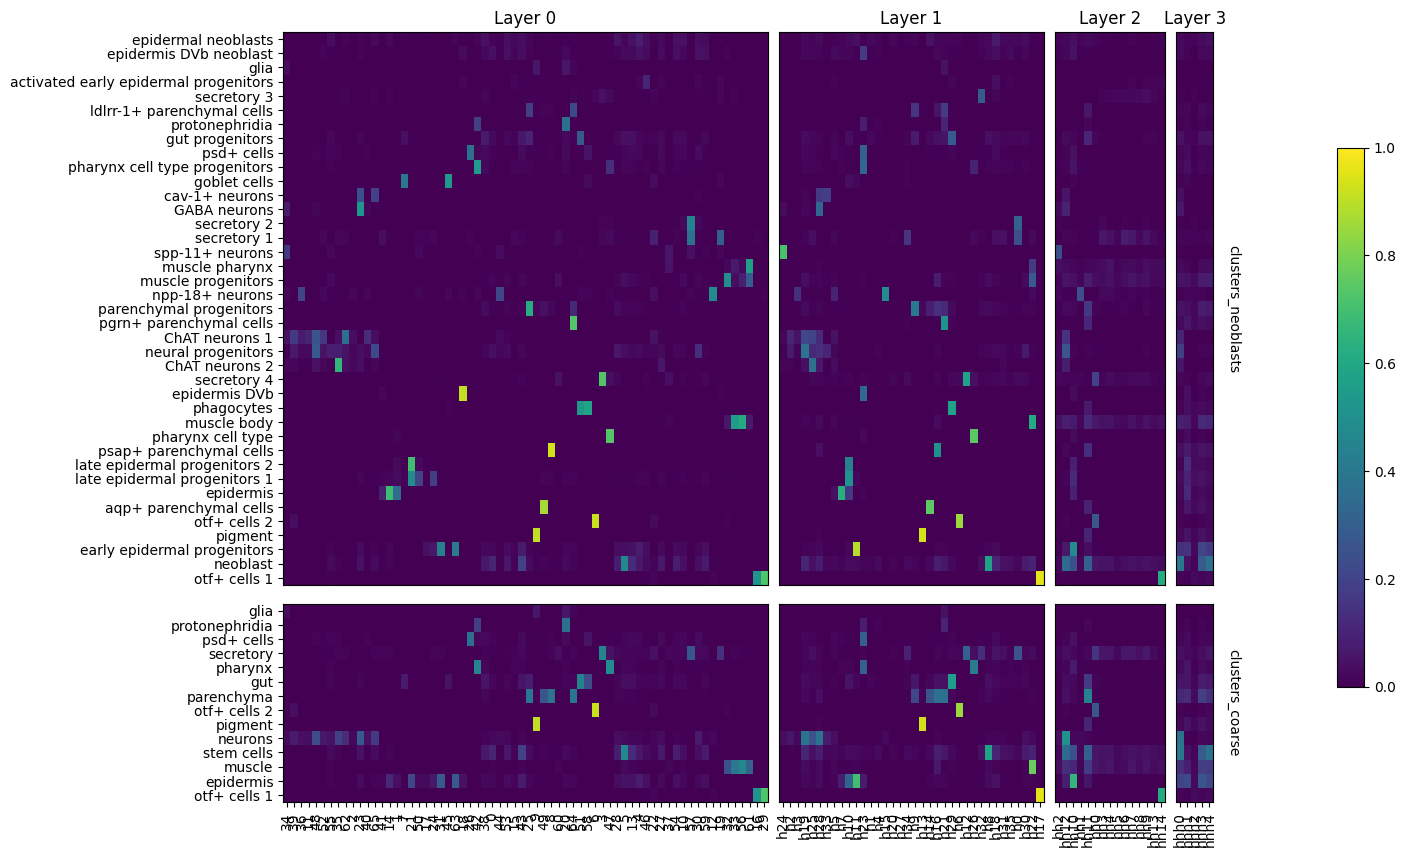

In [20]:
obs_keys = ['clusters_neoblasts', 'clusters_coarse']
scd.plot_obs_scores(obs_keys, figsize=(16,10), hierarchy=true_hierarchy)

The graph shows the top scoring genes for each factor at the lowest layer, and their aggregations in the upper layers. For example, factors 2 and 7 in Layer 0 correspond to respectively, and they are aggregated in Layer 1. Similarly, factors 8 and 9 in Layer 0 correspond to T cell subtypes and they are aggregated in Layer 1.

The level of inheritance between layers can be controlled in the scDEF object parameters via `factor_shapes`. By default, these are set to `[1., .1, .1]`. To increase the level of inheritance, we can increase the Layer 1 and Layer 2 terms, for example to `[1., 10., 10.]`. The aggregations will then be stronger.

We can also visualize the multilayer structure of scDEF in a PAGA graph. This will show a graph representing the similarity between the factors at each layer. We can leverage the structure of the scDEF by initializing the graph at each layer `i` with the graph at layer `i+1` to keep them consistent across layers.

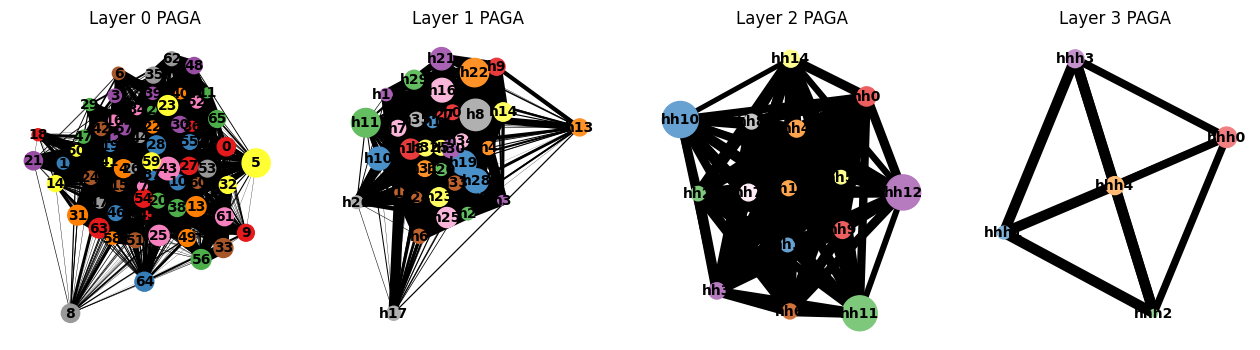

In [21]:
scd.plot_multilevel_paga(figsize=(16,4), reuse_pos=True, frameon=False)

Finally, scDEF also comes with a utility function to plot associations between cell annotations and factors, using a dotplot. In a multi-batch setting, this is useful to check which factors are batch-specific. Here we simply compare the factors with the annotations provided by Leiden clustering, which is an `obs` in the `scd.adata` object.